In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

/tmp/ipykernel_29/45929335.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  X_train.append(imageio.imread(working_dir + "/" + file))


300


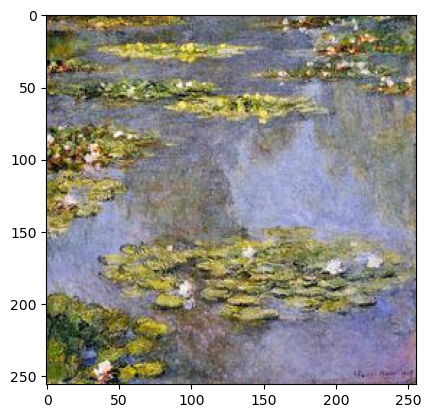

In [2]:
X_train = []

working_dir = '/kaggle/input/gan-getting-started/monet_jpg'

for file in os.listdir(working_dir):
    #print(file)
    X_train.append(imageio.imread(working_dir + "/" + file))

#print(X_train[0:5])
print(len(X_train))

plt.imshow(X_train[0], cmap='gray')
plt.show()

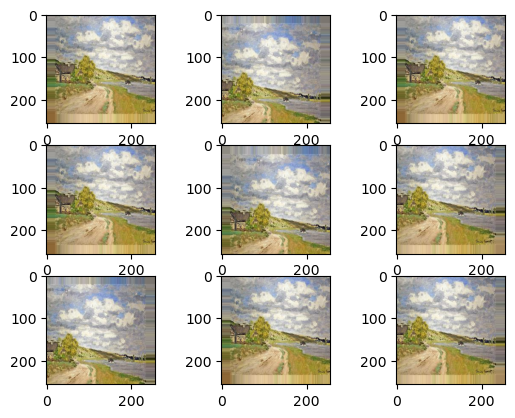

In [3]:
from keras.preprocessing.image import ImageDataGenerator

data = X_train[1]
samples = np.expand_dims(data, 0)
datagen = ImageDataGenerator(height_shift_range=[-20,20], width_shift_range=[-20, 20])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # generate batch of images
 batch = it.next()
 # convert to unsigned integers for viewing
 image = batch[0].astype('uint8')
 # plot raw pixel data
 plt.imshow(image)
# show the figure
plt.show()

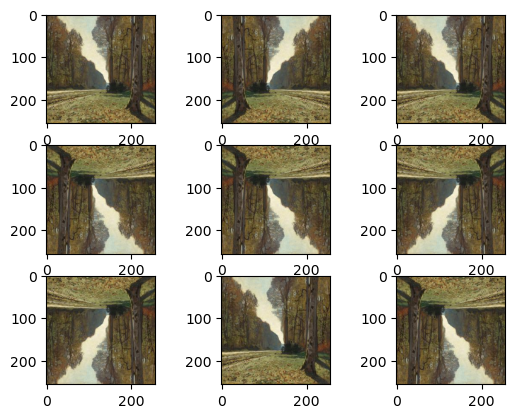

In [4]:
data = X_train[2]
samples = np.expand_dims(data, 0)
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # generate batch of images
 batch = it.next()
 # convert to unsigned integers for viewing
 image = batch[0].astype('uint8')
 # plot raw pixel data
 plt.imshow(image)
# show the figure
plt.show()

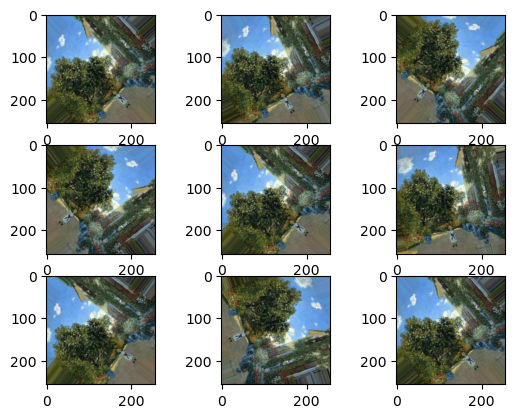

In [8]:
data = X_train[3]
samples = np.expand_dims(data, 0)
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # generate batch of images
 batch = it.next()
 # convert to unsigned integers for viewing
 image = batch[0].astype('uint8')
 # plot raw pixel data
 plt.imshow(image)
# show the figure
plt.show()

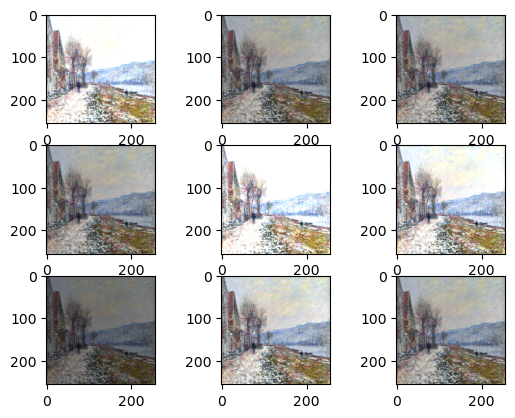

In [9]:
data = X_train[4]
samples = np.expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0.5,1.5])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # generate batch of images
 batch = it.next()
 # convert to unsigned integers for viewing
 image = batch[0].astype('uint8')
 # plot raw pixel data
 plt.imshow(image)
# show the figure
plt.show()

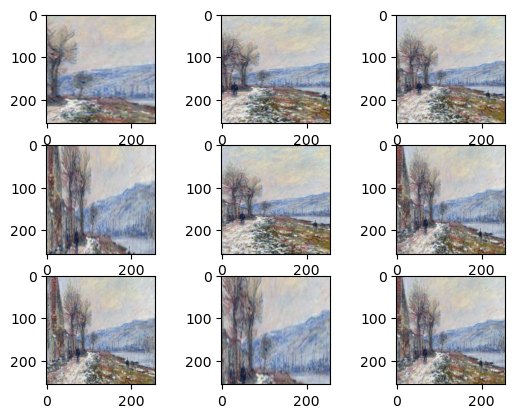

In [10]:
data = X_train[4]
samples = np.expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range=[0.2, 1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # generate batch of images
 batch = it.next()
 # convert to unsigned integers for viewing
 image = batch[0].astype('uint8')
 #print(batch)
 # plot raw pixel data
 plt.imshow(image)
# show the figure
plt.show()

In [4]:
import copy

datagens = [
    ImageDataGenerator(zoom_range=[0.2, 1.0]),
    ImageDataGenerator(brightness_range=[0.5,1.5]),
    ImageDataGenerator(rotation_range=90),
    ImageDataGenerator(horizontal_flip=True, vertical_flip=True),
    ImageDataGenerator(height_shift_range=[-20,20], width_shift_range=[-20, 20])
]

X_train_augmented = copy.deepcopy(X_train)
print(len(X_train))

for data in X_train:
    samples = np.expand_dims(data, 0)
    for datagen in datagens:
        it = datagen.flow(samples, batch_size=1)
        # generate samples and plot
        for i in range(5):
            # generate batch of images
            batch = it.next()
            X_train_augmented.append(batch[0].astype('uint8'))

print(len(X_train_augmented))
    

300
7800


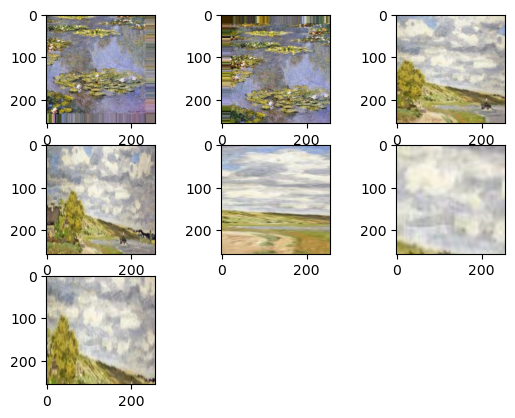

In [12]:
for i,img in enumerate(X_train_augmented[323:330]):  
   plt.subplot(330+1+i)
   plt.imshow(img)
# show the figure
plt.show()

In [5]:
#this uses up like 2.5ish GB??
#todo: use copy=False to save RAM
X_train_augmented = np.asarray(X_train_augmented)

In [6]:
#this uses 4.3ish GB (0 if we use resize instead of reshape)
np.resize(X_train_augmented.shape[0], (256, 256, 3))
#  X_train_augmented.reshape(X_train_augmented.shape[0], 256, 256, 3).astype('float32')

array([[[7800, 7800, 7800],
        [7800, 7800, 7800],
        [7800, 7800, 7800],
        ...,
        [7800, 7800, 7800],
        [7800, 7800, 7800],
        [7800, 7800, 7800]],

       [[7800, 7800, 7800],
        [7800, 7800, 7800],
        [7800, 7800, 7800],
        ...,
        [7800, 7800, 7800],
        [7800, 7800, 7800],
        [7800, 7800, 7800]],

       [[7800, 7800, 7800],
        [7800, 7800, 7800],
        [7800, 7800, 7800],
        ...,
        [7800, 7800, 7800],
        [7800, 7800, 7800],
        [7800, 7800, 7800]],

       ...,

       [[7800, 7800, 7800],
        [7800, 7800, 7800],
        [7800, 7800, 7800],
        ...,
        [7800, 7800, 7800],
        [7800, 7800, 7800],
        [7800, 7800, 7800]],

       [[7800, 7800, 7800],
        [7800, 7800, 7800],
        [7800, 7800, 7800],
        ...,
        [7800, 7800, 7800],
        [7800, 7800, 7800],
        [7800, 7800, 7800]],

       [[7800, 7800, 7800],
        [7800, 7800, 7800],
        [7800, 7

In [87]:
#this uses way more ram too (2ish?)
BUFFER = 7800 #used to be 60000
BATCH = 256 #maybe change to 16

# I was gonna try doing this below line to normalize the discriminator's training data
# But it uses up too much RAM :/ Maybe try using copy=False?
# X_train_augmented = X_train_augmented.astype("float32") / 255.0
training_data = tf.data.Dataset.from_tensor_slices(X_train_augmented).shuffle(BUFFER).batch(BATCH)

In [88]:
def make_generator():

    model = tf.keras.Sequential()
    #model.add(layers.Dense(64*16*16, use_bias=False, input_shape=[256,256,3]))
    #model.add(layers.BatchNormalization())
    #model.add(layers.LeakyReLU())

    #model.add(layers.Reshape((16,16,64)))
    #assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    #model.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', input_shape=(256, 256, 3), use_bias=False))
    #assert model.output_shape == (None, 7, 7, 128)
    #model.add(layers.BatchNormalization())
    #model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (4, 4), strides=(1, 1), padding='same', input_shape=(256, 256, 3), use_bias=False))
    #assert model.output_shape == (None, 14, 14, 64)
    #model.add(layers.BatchNormalization())
    #model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(32, (4, 4), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.Conv2DTranspose(16, (4, 4), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.Conv2DTranspose(3, (4, 4), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    
    #print(model.output_shape)
    assert model.output_shape == (None, 256, 256, 3)
    
    return model
    

/tmp/ipykernel_29/1114046212.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  photo_jpg.append(imageio.imread(working_dir + "/" + file))


7038


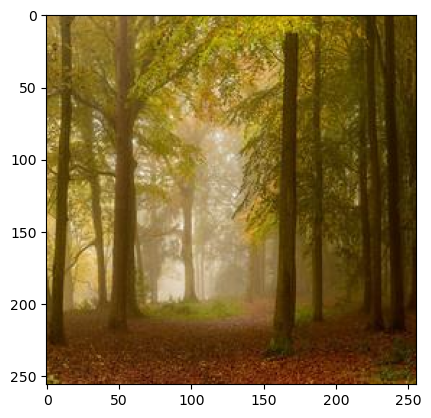

In [89]:
photo_jpg = []

working_dir = '/kaggle/input/gan-getting-started/photo_jpg'

for file in os.listdir(working_dir):
    #print(file)
    photo_jpg.append(imageio.imread(working_dir + "/" + file))

#print(X_train[0:5])
print(len(photo_jpg))

plt.imshow(photo_jpg[0])
plt.show()

(256, 256, 3)


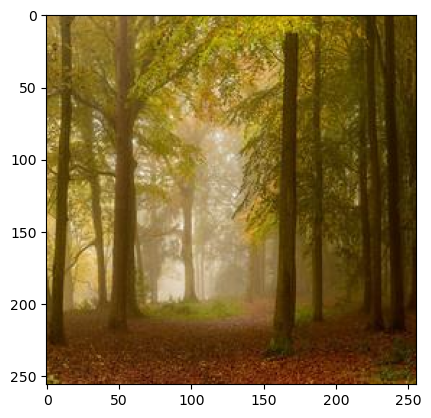

In [48]:
print(photo_jpg[0].shape)
plt.imshow(photo_jpg[0])
plt.show()

(10, 256, 256, 3)


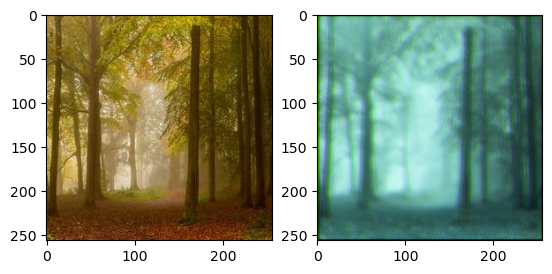

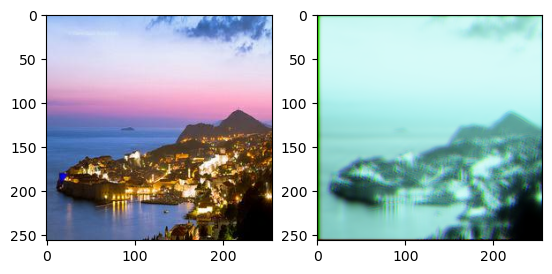

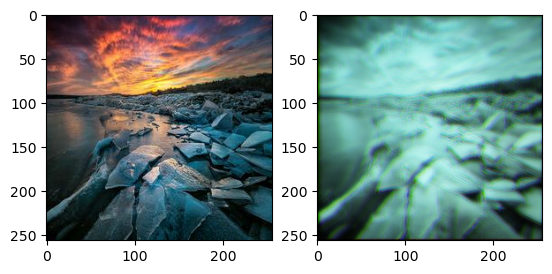

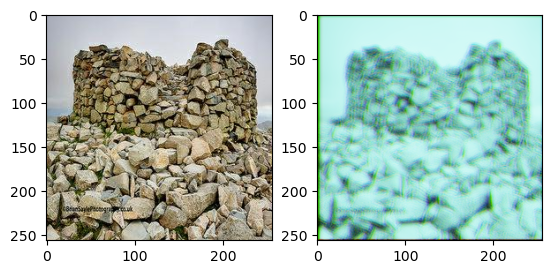

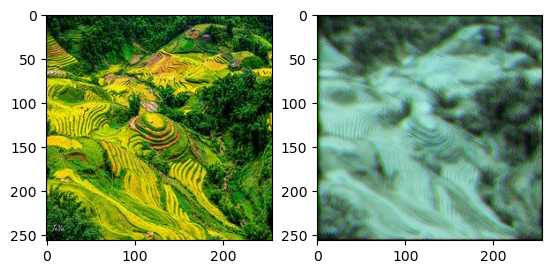

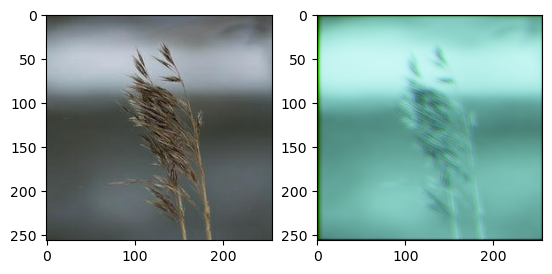

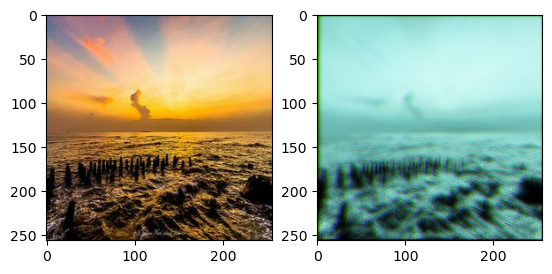

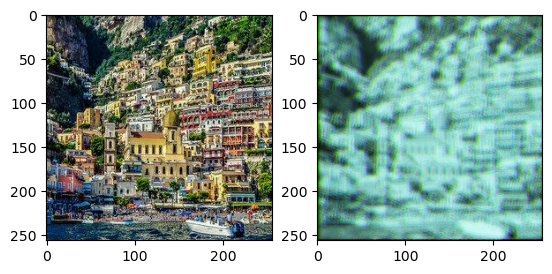

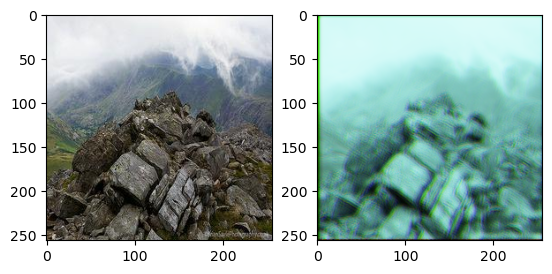

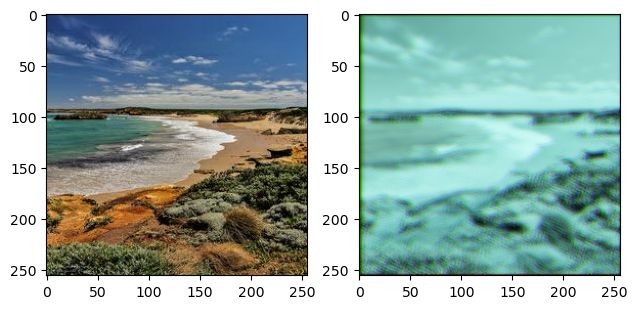

In [103]:
def preview_generator(generator, num_outputs):
    gen_input = photo_jpg[0:10]
    gen_input = np.expand_dims(gen_input, axis=0)
    input_tensor = np.concatenate(gen_input, axis=0)
    input_tensor = input_tensor.astype("float32") / 255.0

    generated_img = generator(input_tensor, training=False)
    print(generated_img.shape)

    for i in range(num_outputs):
        fig, axs = plt.subplots(1, 2)

        # Plot the first image
        axs[0].imshow(photo_jpg[i])

        # Plot the second image
        axs[1].imshow(generated_img[i,:,:,])
    # Adjust the layout and spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

(5, 256, 256, 3)


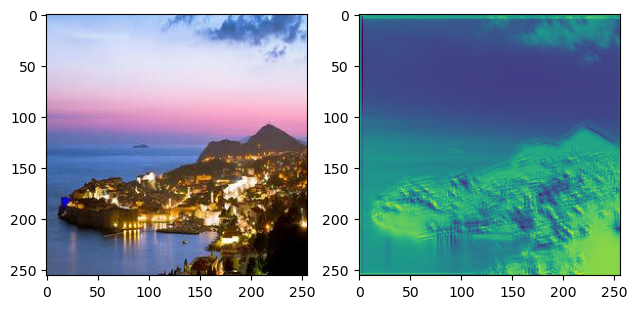

In [90]:
generator = make_generator()

preview_generator(generator, 1)

# #noise = tf.random.normal([1, 100])
# gen_input = photo_jpg[0:5]
# gen_input = np.expand_dims(gen_input, axis=0)
# input_tensor = np.concatenate(gen_input, axis=0)
# input_tensor = input_tensor.astype("float32") / 255.0

# #print(photo_jpg[0].shape)
# #generated_img = generator(gen_input, training=False)
# generated_img = generator(input_tensor, training=False)
# print(generated_img.shape)

# fig, axs = plt.subplots(1, 2)

# # Plot the first image
# axs[0].imshow(photo_jpg[1])

# # Plot the second image
# axs[1].imshow(generated_img[1,:,:,0])

# # Adjust the layout and spacing
# plt.tight_layout()

# # Show the plot
# plt.show()

In [91]:
def make_discriminator():
    model = tf.keras.Sequential()
#     model.add(layers.Conv2D(32, (4,4), strides=(2,2), padding='same', input_shape=[256,256,3]))
    model.add(layers.Conv2D(64, (4,4), strides=(2,2), padding='same', input_shape=[256,256,3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(128, (4,4), strides=(2,2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(256, (4,4), strides=(2,2), padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    
    return model

In [92]:
discriminator = make_discriminator()
decision = discriminator(generated_img)
print(decision)

tf.Tensor(
[[-0.01806572]
 [-0.01272047]
 [-0.00908623]
 [-0.00931949]
 [-0.02131963]], shape=(5, 1), dtype=float32)


In [93]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [94]:
def discriminator_loss(real, fake):
    real_loss = cross_entropy(tf.ones_like(real), real)
    fake_loss = cross_entropy(tf.zeros_like(fake), fake)
    total_loss = real_loss+fake_loss
    return total_loss

In [95]:
def generator_loss(fake):
    return cross_entropy(tf.ones_like(fake), fake)

In [96]:
generator_optimizer = tf.keras.optimizers.legacy.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.legacy.Adam(1e-4)

In [17]:
'''
EPOCHS = 100
noise_dim = 100
num = 16

seed = tf.random.normal([num, noise_dim])

@tf.function 
def train_step(images):
    noise = tf.random.normal([BATCH, noise_dim])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        
        real = discriminator(images, training=True)
        fake = discriminator(generated_images, training=True)
        
        gen_loss = generator_loss(fake)

        disc_loss = discriminator_loss(real, fake)
        
        tf.print(gen_loss, disc_loss)
        
    gradients_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_disc = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    generator_optimizer.apply_gradients(zip(gradients_gen, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_disc, discriminator.trainable_variables))
'''

In [97]:
#EXPIEREMIMENTATINOIN 
import random

EPOCHS = 50
noise_dim = 100
num = 16

@tf.function 
def train_step(images):
#     tf.print("Train step running")
    
    
    #gen_input = photo_jpg[0:16]
    gen_input = []
    for i in range(0, 16):
        rand_idx = random.randint(1, 7000)
        gen_input.append(photo_jpg[rand_idx])
        
    gen_input = np.expand_dims(gen_input, axis=0)
    input_tensor = np.concatenate(gen_input, axis=0)
     input_tensor = input_tensor.astype("float32") / 255.0
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
#         tf.print("running inner train")
        generated_images = generator(input_tensor, training=False)
        
        real = discriminator(images, training=True)
        fake = discriminator(generated_images, training=True)
        
        gen_loss = generator_loss(fake)

        disc_loss = discriminator_loss(real, fake)
        
#         tf.print(gen_loss, disc_loss)
        
    gradients_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_disc = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    generator_optimizer.apply_gradients(zip(gradients_gen, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_disc, discriminator.trainable_variables))
    

In [98]:
def train(dataset, epochs):
    preview_generator(generator, 1)
    for epoch in range(epochs):
        if epoch%2 != 0:
            preview_generator(generator, 1)
            
        start = time.time()
        for image_batch in dataset:
            train_step(image_batch)
            #print("train step ran")
        
        print('Time for epoch {} is {} sec'.format(epoch+1, time.time()-start))
        
    #display.clear_output(wait=True)

In [99]:
# at 6.5GB ram before this (or 9.2GB with 16 batch size)
train(training_data, EPOCHS)

2023-07-13 19:13:50.398806: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_21/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-07-13 19:14:05.012185: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_21/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Time for epoch 1 is 17.328579902648926 sec
Time for epoch 2 is 14.077476978302002 sec
Time for epoch 3 is 14.08132290840149 sec
Time for epoch 4 is 14.079427719116211 sec
Time for epoch 5 is 14.077916145324707 sec
Time for epoch 6 is 14.079036951065063 sec
Time for epoch 7 is 14.08030080795288 sec
Time for epoch 8 is 14.076964378356934 sec
Time for epoch 9 is 14.079415321350098 sec
Time for epoch 10 is 14.077451467514038 sec
Time for epoch 11 is 14.080004930496216 sec
Time for epoch 12 is 14.077554941177368 sec
Time for epoch 13 is 14.080208539962769 sec
Time for epoch 14 is 14.077430248260498 sec
Time for epoch 15 is 14.082652568817139 sec
Time for epoch 16 is 14.082024574279785 sec
Time for epoch 17 is 14.077321529388428 sec
Time for epoch 18 is 14.077953100204468 sec
Time for epoch 19 is 14.07967233657837 sec
Time for epoch 20 is 14.080415725708008 sec
Time for epoch 21 is 14.08240818977356 sec
Time for epoch 22 is 14.080374240875244 sec
Time for epoch 23 is 14.079235553741455 sec
T

In [30]:
#plot loss function of GAN as training occurs
#generate images every few epochs to see performance improvement during training

In [ ]:
preview_generator(generator, 10)

In [1]:
gen_input = photo_jpg[0:10]
gen_input = np.expand_dims(gen_input, axis=0)
input_tensor = np.concatenate(gen_input, axis=0)
input_tensor = input_tensor.astype("float32") / 255.0

generated_img = generator(input_tensor, training=False)
print(generated_img.shape)

for i in range(5):
    fig, axs = plt.subplots(1, 2)

    # Plot the first image
    axs[0].imshow(photo_jpg[i])

    # Plot the second image
    axs[1].imshow(generated_img[i,:,:,])
# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

NameError: name 'photo_jpg' is not defined